In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
data=pd.read_csv('C:/Users/Asus/Downloads/archive (3)/NYC-Airbnb-2023.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.300000,3,314,1.000000
1,1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.300000,2,365,0.000000
2,2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,25,2017-07-21,0.720000,1,0,0.000000
3,3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,25,2023-02-19,1.000000,1,106,7.736507
4,4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.030000,1,181,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,2023-01-02,1.168988,1,8,0.000000
42927,42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,2023-01-02,1.168988,5,79,0.000000
42928,42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,2023-01-02,1.168988,8,356,0.000000
42929,42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,2023-01-02,1.168988,1,87,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      42931 non-null  int64  
 1   id                              42931 non-null  int64  
 2   name                            42919 non-null  object 
 3   host_id                         42931 non-null  int64  
 4   host_name                       42926 non-null  object 
 5   neighbourhood_group             42931 non-null  object 
 6   neighbourhood                   42931 non-null  object 
 7   latitude                        42931 non-null  float64
 8   longitude                       42931 non-null  float64
 9   room_type                       42931 non-null  object 
 10  price                           42931 non-null  int64  
 11  minimum_nights                  42931 non-null  int64  
 12  number_of_reviews               

In [4]:
def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                
        if data[column].nunique() < 50:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                     continuous
------------------------------  -----------------
neighbourhood_group             Unnamed: 0
room_type                       id
calculated_host_listings_count  name
number_of_reviews_ltm           host_id
                                host_name
                                neighbourhood
                                latitude
                                longitude
                                price
                                minimum_nights
                                number_of_reviews
                                last_review
                                reviews_per_month
                                availability_365


In [5]:
data.isnull().sum()

Unnamed: 0                         0
id                                 0
name                              12
host_id                            0
host_name                          5
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [6]:
data['last_review'].fillna(data['last_review'].mode()[0],inplace=True)

In [7]:
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(),inplace=True)

In [8]:
data.isnull().sum()

Unnamed: 0                         0
id                                 0
name                              12
host_id                            0
host_name                          5
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

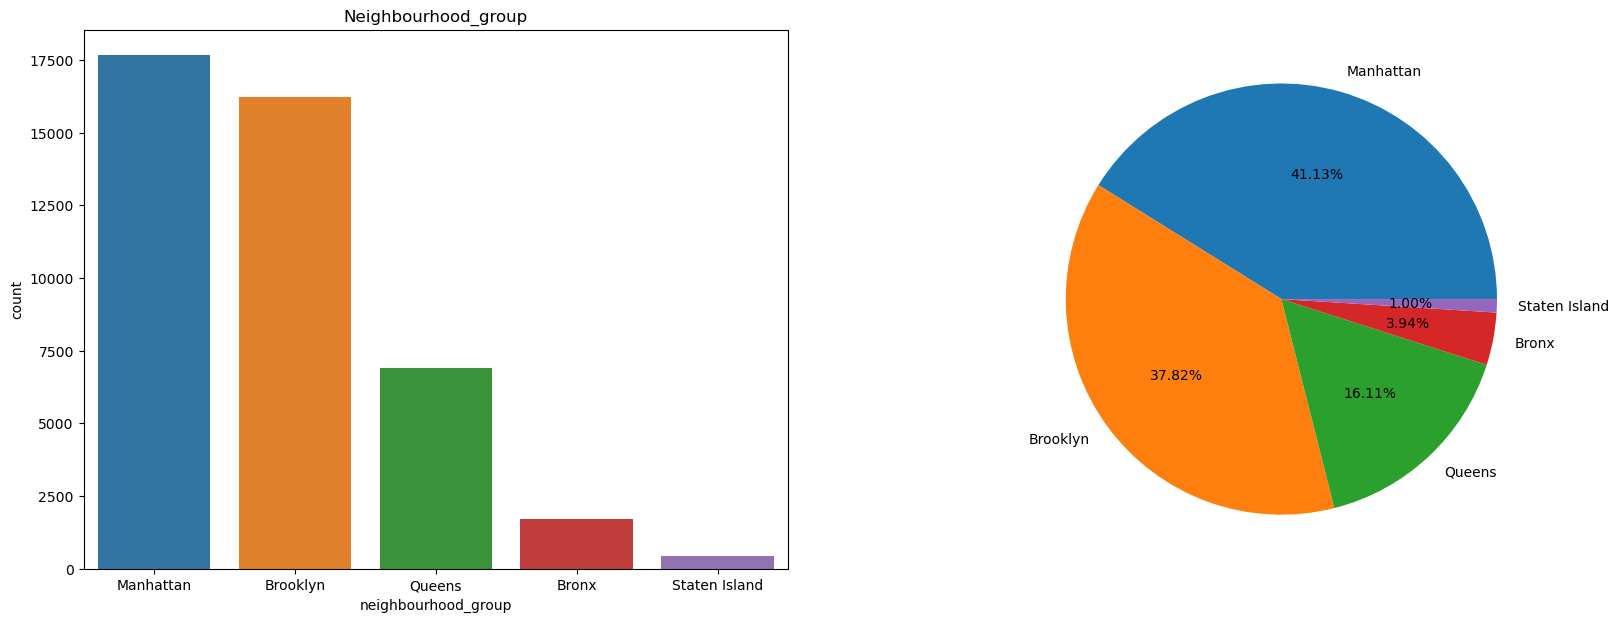

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax[0].set_title("Neighbourhood_group")                  
va = data["neighbourhood_group"].value_counts()         
labels = list(data["neighbourhood_group"].value_counts().index) 

sns.countplot(x=data["neighbourhood_group"], ax = ax[0])
plt.pie(va,labels = labels, autopct= "%0.2f%%")   

plt.show()

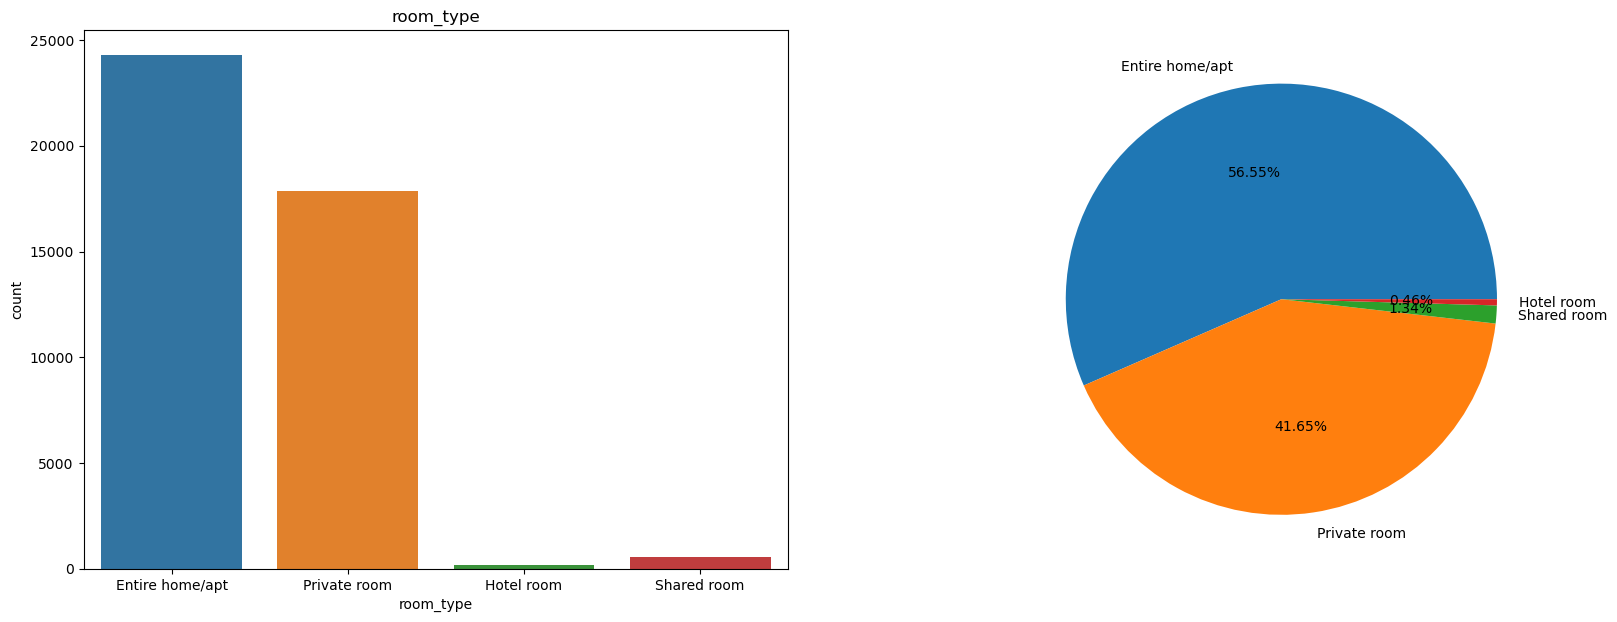

In [10]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
ax[0].set_title("room_type")
values=data['room_type'].value_counts()
labels=list(data['room_type'].value_counts().index)
sns.countplot(x=data['room_type'],ax=ax[0])
plt.pie(values,labels=labels,autopct="%0.2f%%")
plt.show()

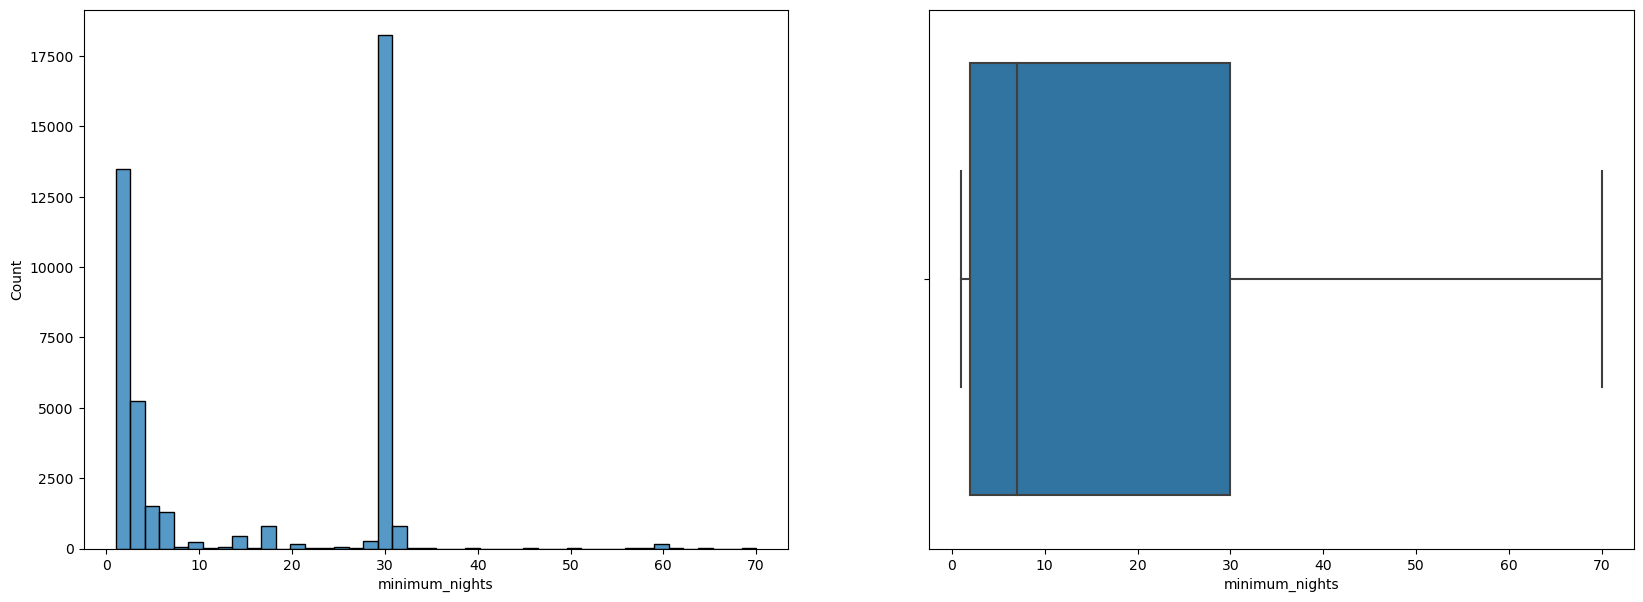

In [11]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=data['minimum_nights'],ax=ax[0])
sns.boxplot(x=data['minimum_nights'],ax=ax[1])
plt.show()

In [12]:
Q1=data['minimum_nights'].quantile(0.25) 
Q3=data['minimum_nights'].quantile(0.75) 
IQR=Q3-Q1 
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print(UF,LF)
    

72.0 -40.0


In [13]:
mean = int(data['minimum_nights'].mean())

x = data[(data["minimum_nights"] > 72) | (data['minimum_nights']<0)].index
for index in x:
    data.loc[index, "minimum_nights"] = mean
    

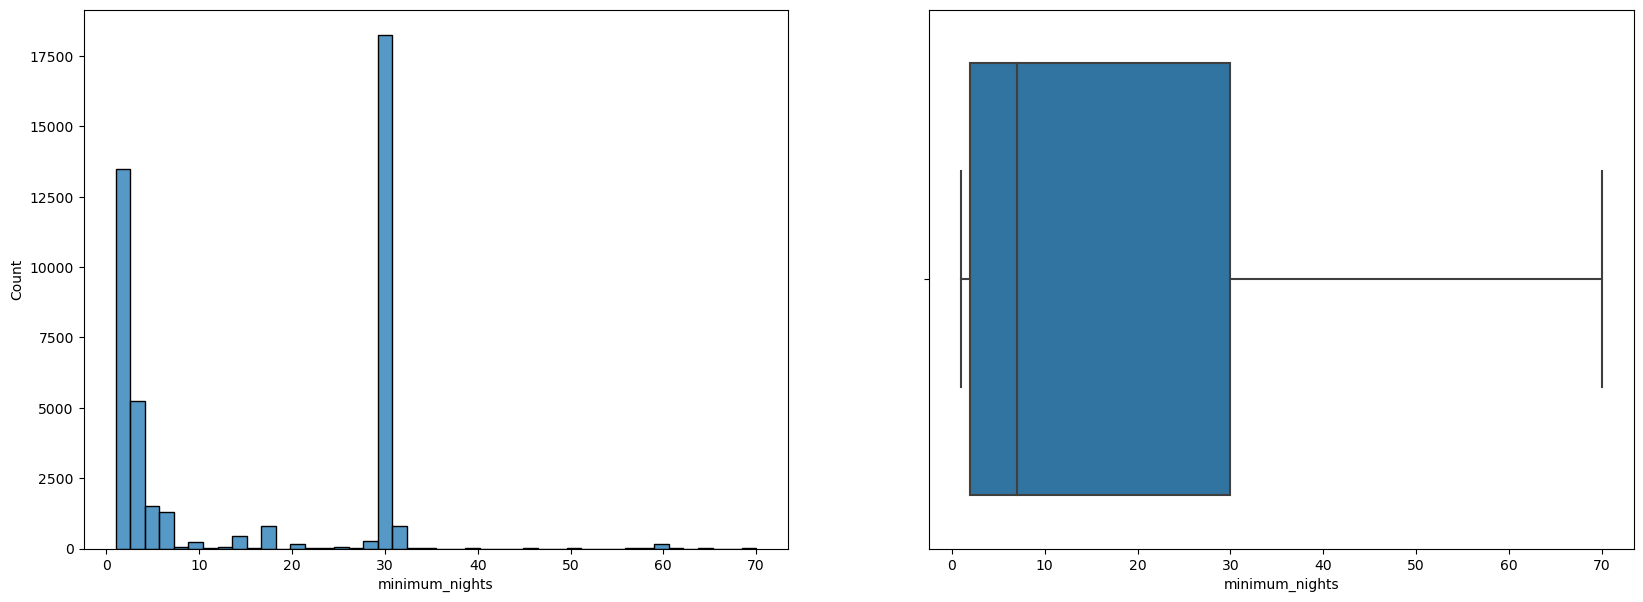

In [14]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=data['minimum_nights'],ax=ax[0])
sns.boxplot(x=data['minimum_nights'],ax=ax[1])
plt.show()

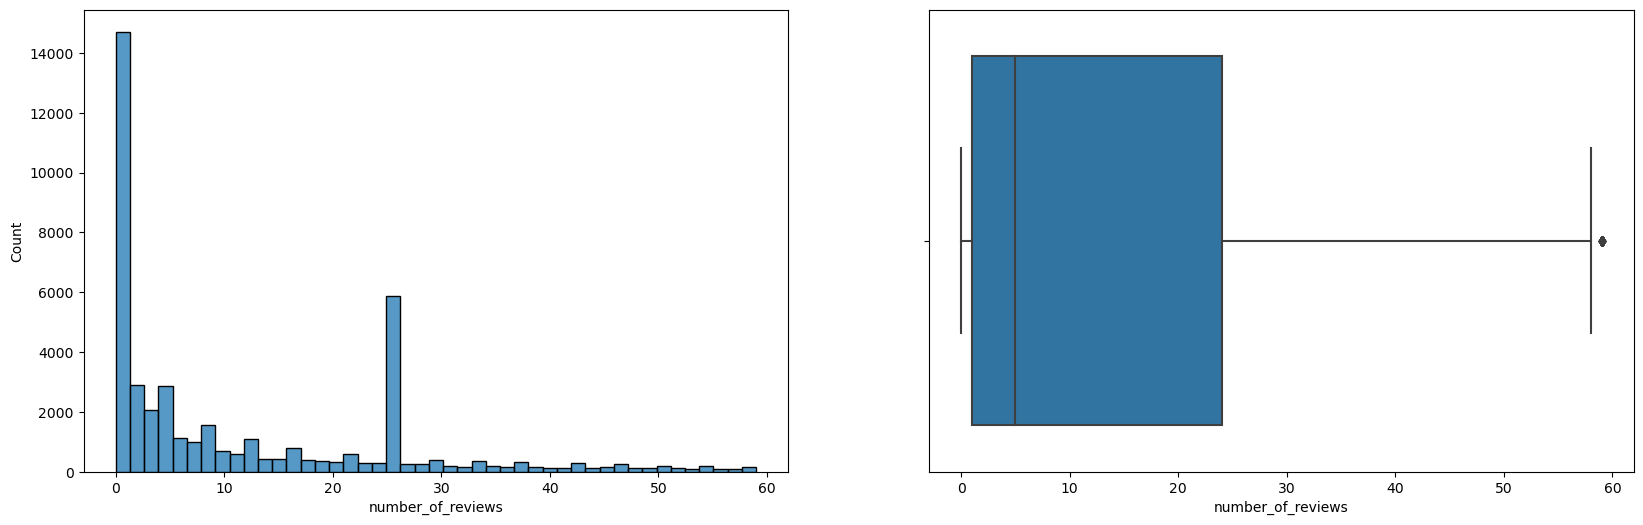

In [15]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['number_of_reviews'],ax=ax[0])
sns.boxplot(x=data['number_of_reviews'],ax=ax[1])
plt.show()

In [16]:
Q1=data['number_of_reviews'].quantile(0.25) 
Q3=data['number_of_reviews'].quantile(0.75) 
IQR=Q3-Q1 
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print(UF,LF)
    

58.5 -33.5


In [17]:
mean=int(data['number_of_reviews'].mean())
x=data[(data['number_of_reviews']>59) | (data['number_of_reviews']<0)].index
for index in x:
    data.loc[index, 'number_of_reviews']=mean

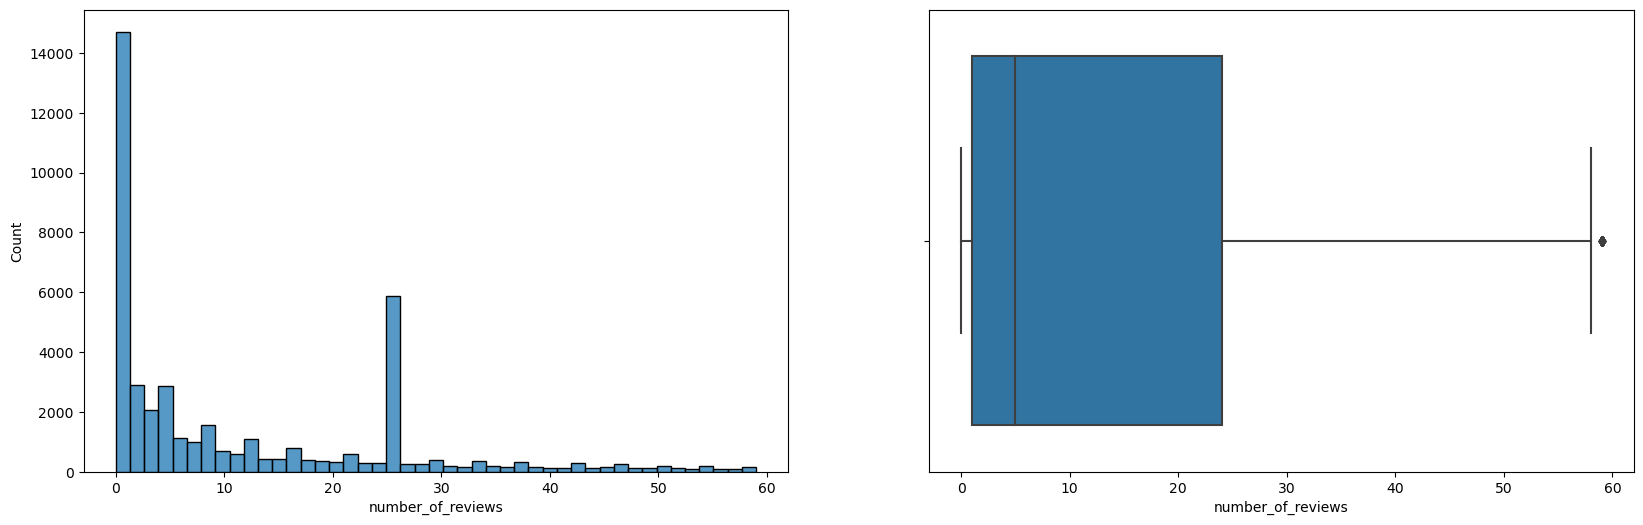

In [18]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['number_of_reviews'],ax=ax[0])
sns.boxplot(x=data['number_of_reviews'],ax=ax[1])
plt.show()

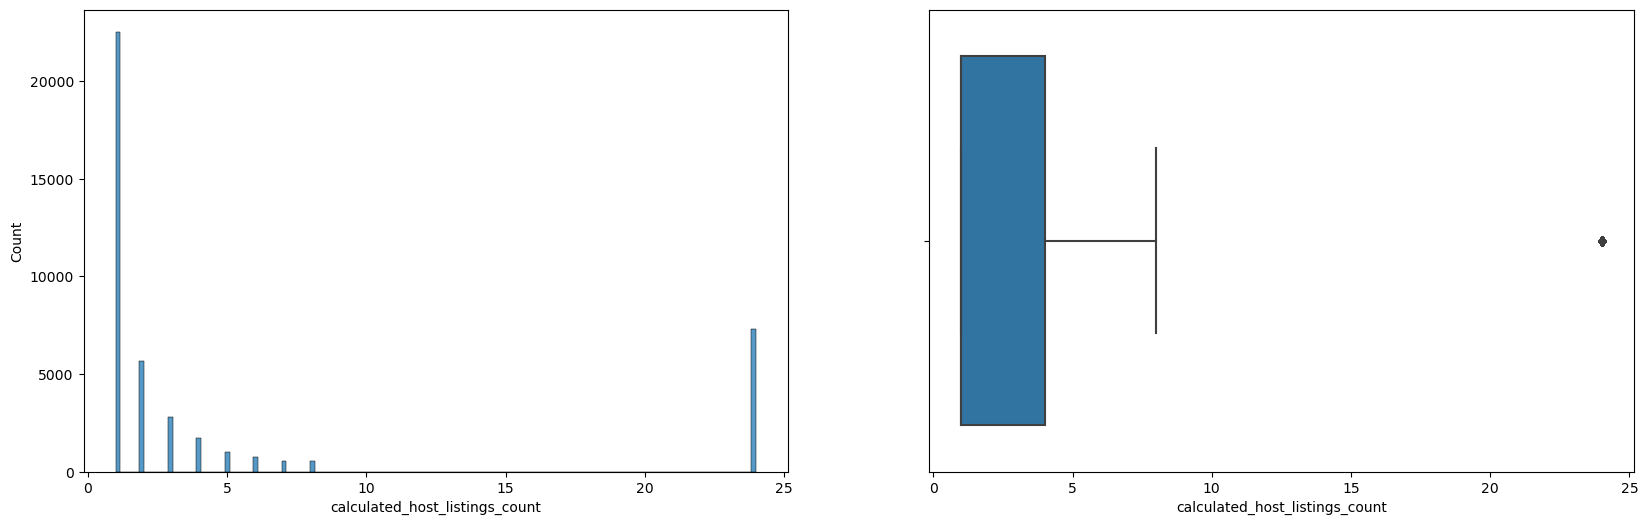

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['calculated_host_listings_count'],ax=ax[0])
sns.boxplot(x=data['calculated_host_listings_count'],ax=ax[1])
plt.show()

In [20]:
Q1=data['calculated_host_listings_count'].quantile(0.25) 
Q3=data['calculated_host_listings_count'].quantile(0.75) 
IQR=Q3-Q1 
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print(UF,LF)
    

8.5 -3.5


In [21]:
mean=int(data['calculated_host_listings_count'].mean())
x=data[(data['calculated_host_listings_count']>8) | (data['calculated_host_listings_count']<0)].index
for index in x:
    data.loc[index, 'calculated_host_listings_count']=mean

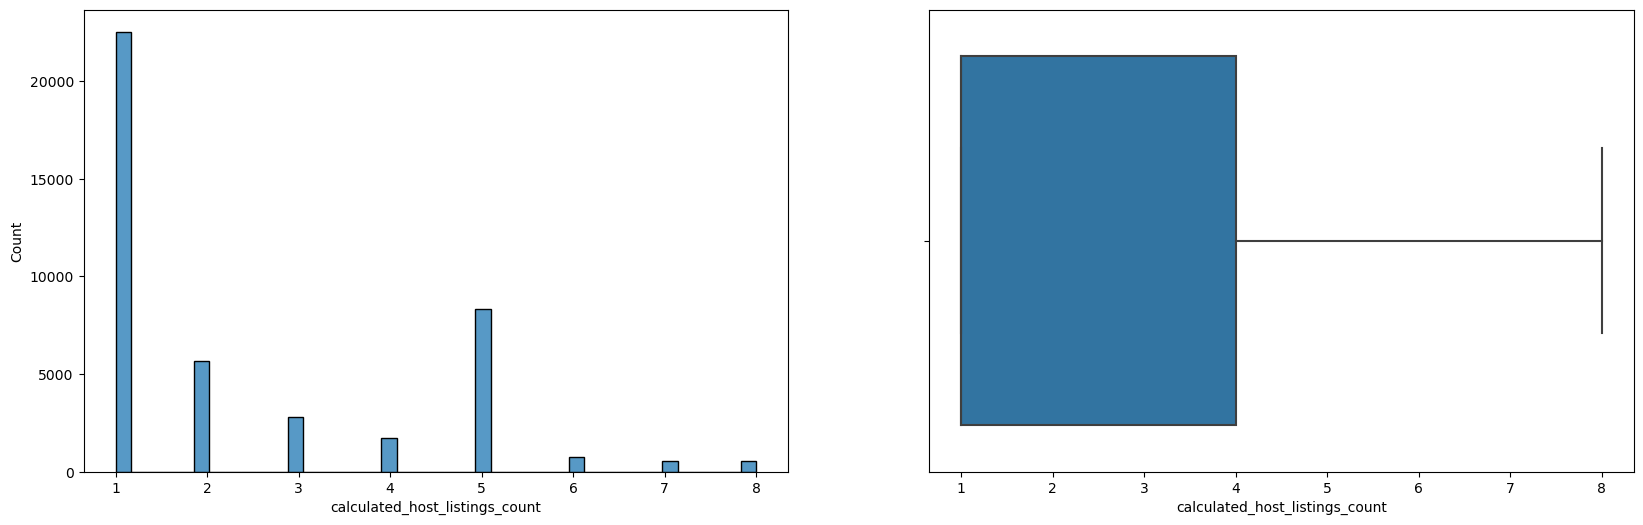

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['calculated_host_listings_count'],ax=ax[0])
sns.boxplot(x=data['calculated_host_listings_count'],ax=ax[1])
plt.show()

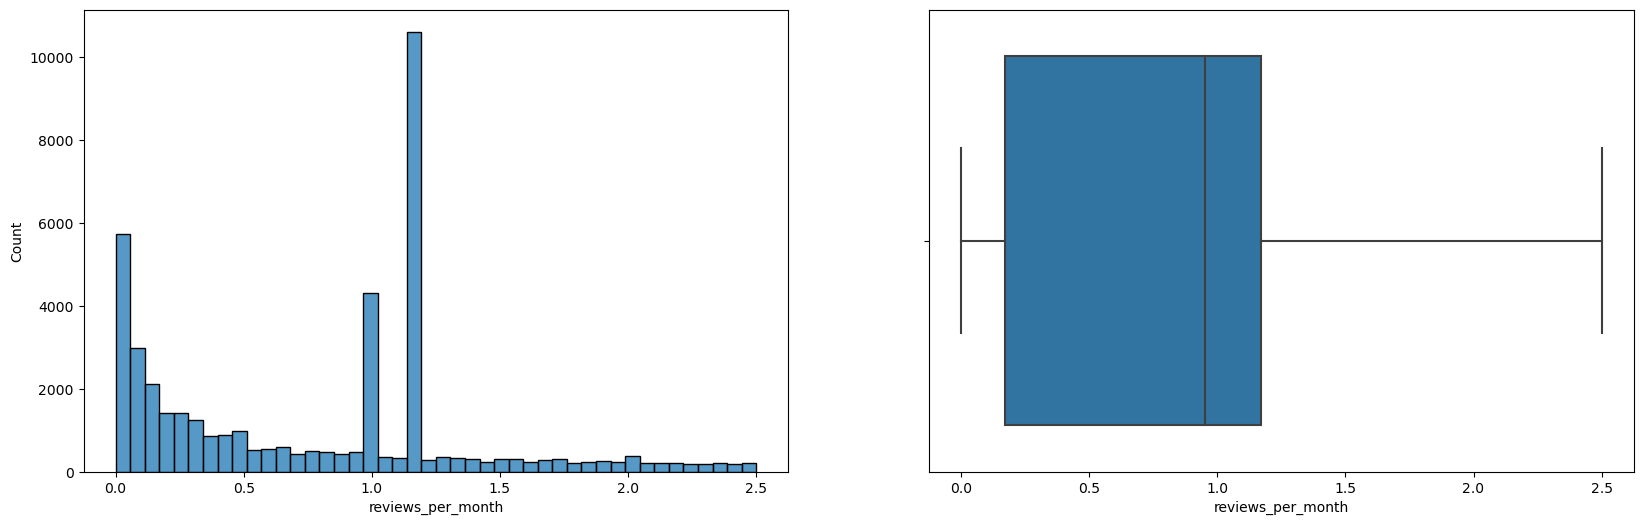

In [23]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['reviews_per_month'],ax=ax[0])
sns.boxplot(x=data['reviews_per_month'],ax=ax[1])
plt.show()

In [24]:
Q1=data['reviews_per_month'].quantile(0.25) 
Q3=data['reviews_per_month'].quantile(0.75) 
IQR=Q3-Q1 
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print(UF,LF)
    

2.667470653140076 -1.3284823918840458


In [25]:
mean=int(data['reviews_per_month'].mean())
x=data[(data['reviews_per_month']>2.5) | (data['reviews_per_month']<0)].index
for index in x:
    data.loc[index, 'reviews_per_month']=mean

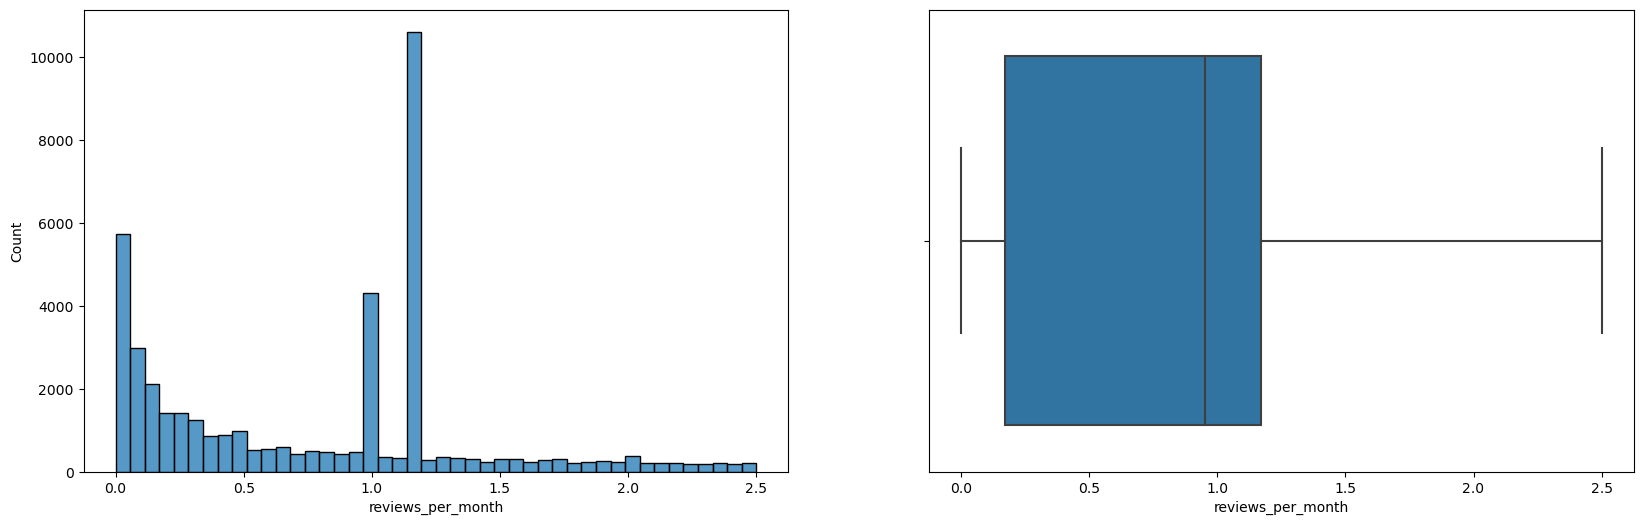

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['reviews_per_month'],ax=ax[0])
sns.boxplot(x=data['reviews_per_month'],ax=ax[1])
plt.show()

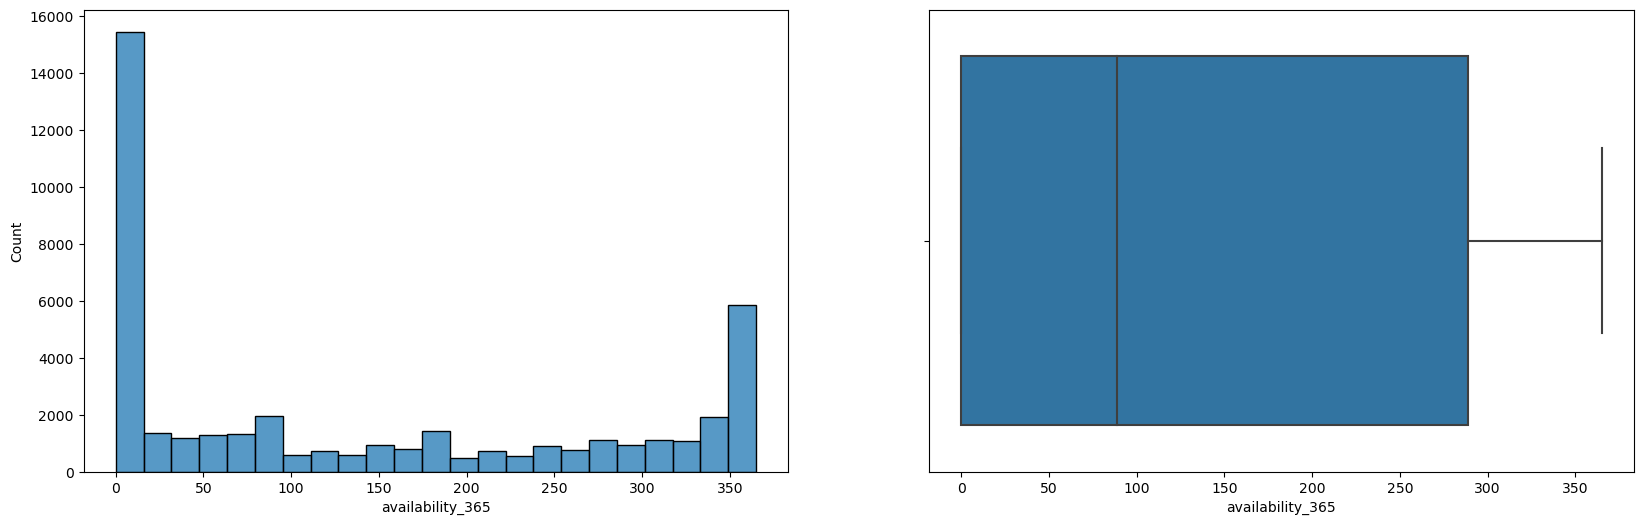

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['availability_365'],ax=ax[0])
sns.boxplot(x=data['availability_365'],ax=ax[1])
plt.show()

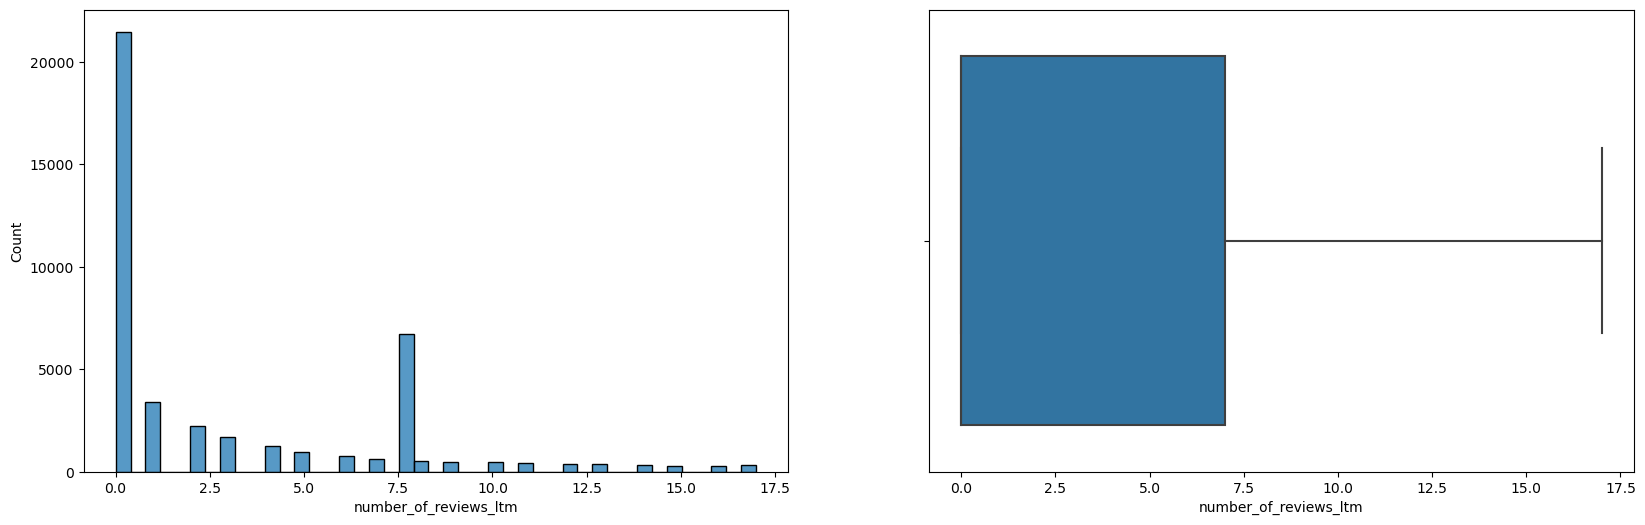

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['number_of_reviews_ltm'],ax=ax[0])
sns.boxplot(x=data['number_of_reviews_ltm'],ax=ax[1])
plt.show()

In [29]:
Q1=data['number_of_reviews_ltm'].quantile(0.25) 
Q3=data['number_of_reviews_ltm'].quantile(0.75) 
IQR=Q3-Q1 
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print(UF,LF)
    

17.5 -10.5


In [30]:
mean=data['number_of_reviews_ltm'].mean()
x=data[(data['number_of_reviews_ltm']>17) | (data['number_of_reviews_ltm']<0)].index

for index in x:
    data.loc[index , 'number_of_reviews_ltm']=mean

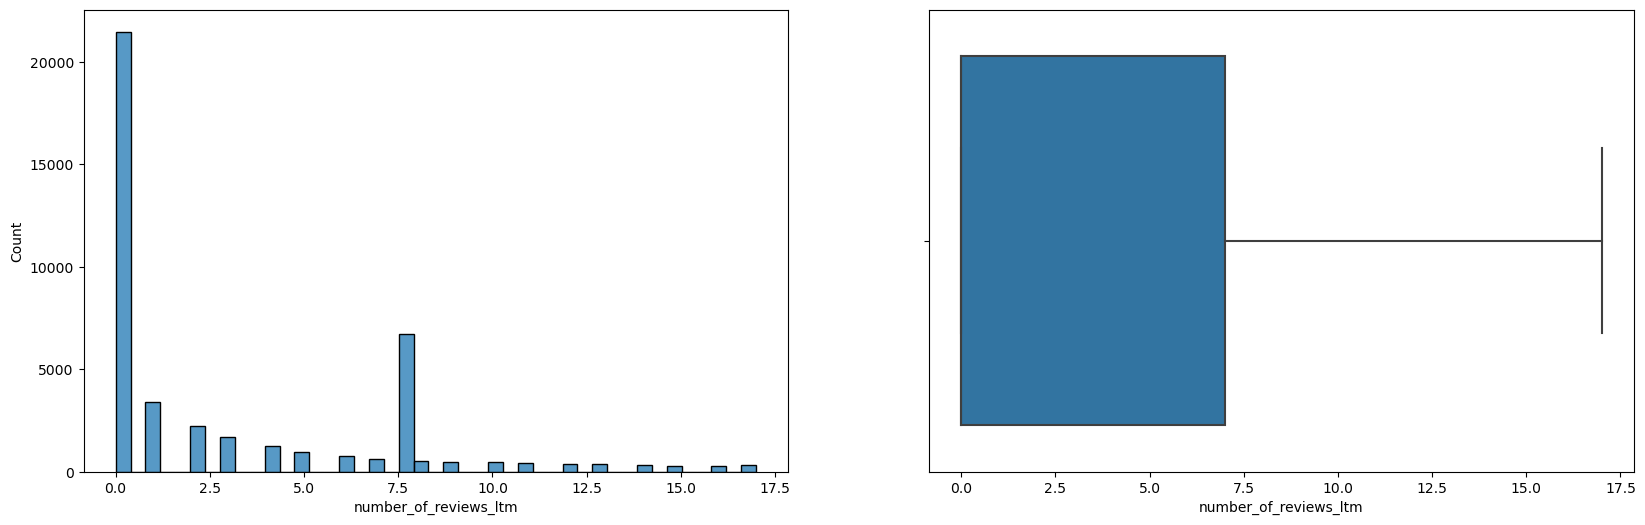

In [31]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.histplot(x=data['number_of_reviews_ltm'],ax=ax[0])
sns.boxplot(x=data['number_of_reviews_ltm'],ax=ax[1])
plt.show()

In [32]:
import csv
data.to_csv('C:/Users/Asus/Downloads/archive (3)/NYC-Airbnb-2023.csv')

In [33]:
data=pd.read_csv('C:/Users/Asus/Downloads/archive (3)/NYC-Airbnb-2023.csv')
data

,Unnamed: 0.1,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,49,2022-06-21,0.300000,3,314,1.000000
1,1,1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.300000,2,365,0.000000
2,2,2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,25,2017-07-21,0.720000,1,0,0.000000
3,3,3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,25,2023-02-19,1.000000,1,106,7.736507
4,4,4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,60,3,2022-08-10,0.030000,1,181,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,42926,42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,2023-01-02,1.168988,1,8,0.000000
42927,42927,42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,2023-01-02,1.168988,5,79,0.000000
42928,42928,42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,2023-01-02,1.168988,8,356,0.000000
42929,42929,42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,2023-01-02,1.168988,1,87,0.000000


In [34]:
data.isnull().sum()

Unnamed: 0.1                       0
Unnamed: 0                         0
id                                 0
name                              12
host_id                            0
host_name                          5
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [35]:
data['room_type'].value_counts()

Entire home/apt    24279
Private room       17879
Shared room          576
Hotel room           197
Name: room_type, dtype: int64

In [36]:
data['price'].min()

0

In [37]:
data['price'].replace(0,data['price'].mean(),inplace=True)

In [38]:
data1=data[(data['price']>=10) & (data['price']<=30)]
data1[['name','host_name','id','host_id','number_of_reviews']]

,name,host_name,id,host_id,number_of_reviews
488,Williamsburg /artist bunk small,Kris & Di,392948,312722,14
1583,East Williamsburg Room near L train,Reid,2082670,10638597,2
1925,Huge room in South Prospect Park,Yago,2563764,13125674,1
1963,Great room with awesome amenities!,Johnny,2592640,13272957,1
1985,"$455 Cozy 1bd, BKLYN Sublet March",Victor,2459916,12577771,0
...,...,...,...,...,...
42284,Great Value Shared Room Bed #1 with big window,Hi-Happy,831734030825187437,501140151,0
42330,semi basement - room#2,Mohammed,830768178454130564,457828432,0
42742,Shared room with a Bed for Male,Ajmol,837011557532225665,479639290,0
42773,Private Room in Upper Manhattan!,Dave,837116049361384863,106660574,0


In [39]:
data['neighbourhood_group'].value_counts()

Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: neighbourhood_group, dtype: int64

In [40]:
data2=pd.pivot_table(data,index='name',values= 'number_of_reviews',aggfunc='sum')
data2

,number_of_reviews
name,
!! Large 3 Bedroom Apartment in NYC!!,23
!!! Designer room in NYC!!! 12 min to Time Square,25
!!Beautiful Large 3 Bedroom Apartment in NYC!!,54
!!Charming 3bedroom apartment on upper west side!!,34
!!Studio next to Empire State Bldg.,7
...,...
🦚 Large room w prívate bathroom and garden,11
🪴Cirilo's Home: Inspiring apartment in Brooklyn🪴,4
🪴XL dojo 🌾 shared green yogi palace apt 🌿,16


In [41]:
data3=data2['number_of_reviews'].sort_values(ascending=False).head(10)
data3

name
Water View King Bed Hotel Room                     854
Beautiful King Bed Hotel Room                      558
Beautiful 2 Double Bed Hotel Room                  527
Loft Suite                                         479
Water View 2 Double Beds Hotel Room                367
138 Bowery-Classic King Studio                     232
Wyndham Midtown 45 NYC (2 Bedroom Presidential)    213
138 Bowery-Classic Queen Studio                    212
Cozy Home Share for Young Professionals            200
138 Bowery-Modern Queen Studio                     192
Name: number_of_reviews, dtype: int64

In [42]:
import numpy as np

In [43]:
data['host_name'].value_counts().sort_values().tail(10)

Jeniffer      181
Shogo         192
Daniel        204
Hiroki        207
June          232
David         306
Michael       322
RoomPicks     381
Eugene        400
Blueground    526
Name: host_name, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    42931 non-null  int64  
 1   Unnamed: 0                      42931 non-null  int64  
 2   id                              42931 non-null  int64  
 3   name                            42919 non-null  object 
 4   host_id                         42931 non-null  int64  
 5   host_name                       42926 non-null  object 
 6   neighbourhood_group             42931 non-null  object 
 7   neighbourhood                   42931 non-null  object 
 8   latitude                        42931 non-null  float64
 9   longitude                       42931 non-null  float64
 10  room_type                       42931 non-null  object 
 11  price                           42931 non-null  float64
 12  minimum_nights                  

In [45]:
data['availability_365'].value_counts().sort_values(ascending=False).head(10)

0      13990
365     2377
364     1152
90       442
180      352
339      343
89       335
363      314
179      281
362      267
Name: availability_365, dtype: int64

In [46]:
data['neighbourhood'].value_counts().sort_values(ascending=False).head(10)

Bedford-Stuyvesant    3086
Williamsburg          2597
Midtown               2182
Harlem                2081
Bushwick              1810
Upper West Side       1541
Hell's Kitchen        1522
Upper East Side       1432
Crown Heights         1330
East Village          1155
Name: neighbourhood, dtype: int64

In [47]:
data['minimum_nights'].value_counts().sort_values().tail(10)

6       370
31      786
18      796
7       922
4      1422
5      1499
3      3814
2      5524
1      7946
30    18235
Name: minimum_nights, dtype: int64

In [48]:
data['room_type'].value_counts()

Entire home/apt    24279
Private room       17879
Shared room          576
Hotel room           197
Name: room_type, dtype: int64

In [49]:
data4=data[data['room_type']=='Entire home/apt']
data4[['id','host_name','neighbourhood',"price",'minimum_nights','number_of_reviews']]

,id,host_name,neighbourhood,price,minimum_nights,number_of_reviews
0,2595,Jennifer,Midtown,150.0,30,49
4,5136,Rebecca,Sunset Park,275.0,60,3
6,5586,Susan,Upper East Side,295.0,4,45
9,6848,Allen & Irina,Williamsburg,81.0,30,25
11,67288,Per,East Harlem,250.0,28,47
...,...,...,...,...,...,...
42920,839437618326468635,Sahel,Upper East Side,424.0,1,0
42925,839728752538060549,Lee,Park Slope,100.0,14,0
42926,839753193689829909,Jean,Williamsburg,76.0,7,0
42928,839797749155954018,Jose,Bushwick,127.0,3,0


In [50]:
data5=data[data['room_type']=='Private room']
data5[['id','host_name','neighbourhood',"price",'minimum_nights','number_of_reviews']]

,id,host_name,neighbourhood,price,minimum_nights,number_of_reviews
1,5121,Garon,Bedford-Stuyvesant,60.0,30,50
2,5203,MaryEllen,Upper West Side,75.0,2,25
3,5178,Shunichi,Midtown,68.0,2,25
5,29628,Chris,Clinton Hill,93.0,3,25
7,5803,Laurie,South Slope,124.0,3,25
...,...,...,...,...,...,...
42922,839604405796522504,Analisa,Bedford-Stuyvesant,36.0,4,0
42923,839607315156742936,Aurgho,Jackson Heights,96.0,1,0
42924,839655582695838383,Monika,South Ozone Park,68.0,1,0
42927,839786573617495393,Charlene,East Village,32.0,30,0


In [51]:
data5=data[data['room_type']=='Shared room']
data5[['id','host_name','neighbourhood',"price",'minimum_nights','number_of_reviews']]

,id,host_name,neighbourhood,price,minimum_nights,number_of_reviews
316,198028,Jaymes,Ditmars Steinway,50.0,18,16
322,200645,Edo,Upper East Side,90.0,30,0
487,467634,Lloyd,Jamaica,39.0,30,25
685,531091,Dragan,Astoria,105.0,30,25
744,619144,Yuichi,Hell's Kitchen,2000.0,30,2
...,...,...,...,...,...,...
42465,834671770404496000,Raffi,Maspeth,144.0,30,0
42742,837011557532225665,Ajmol,Briarwood,25.0,30,0
42758,837080585660754567,J,Port Morris,36.0,1,0
42853,838619767042950204,Liz,Port Morris,26.0,1,0


In [52]:
data5=data[data['room_type']=='Hotel room']
data5[['id','host_name','neighbourhood',"price",'minimum_nights','number_of_reviews']]

,id,host_name,neighbourhood,price,minimum_nights,number_of_reviews
74,77765,The Box House Hotel,Greenpoint,179.000000,1,47
77,80684,The Box House Hotel,Greenpoint,429.000000,1,11
94,84010,The Box House Hotel,Greenpoint,179.000000,1,26
387,253846,The Box House Hotel,Greenpoint,179.000000,1,29
2330,3359510,Vida,Greenpoint,129.000000,30,19
...,...,...,...,...,...,...
22955,46336133,Equinox Hotel,Chelsea,200.307167,1,0
23155,46723973,Ink48 Hotel,Hell's Kitchen,200.307167,1,1
23980,48089897,The Condor Hotel,Bedford-Stuyvesant,200.307167,1,0
24004,48325676,Beacon Hotel,Upper West Side,200.307167,1,3
